In [1]:
from __future__ import division # division without truncating decimals 
import pandas as pd # data manipulation library
import numpy as np # numerical computation library
import datetime as dt 
from datetime import time

import matplotlib.pyplot as plt # plotting library
from matplotlib import cm # color maps for plotting
plt.style.use('ggplot') # use the ggplot plotting style

%matplotlib inline

In [2]:
#reading the csv file
#nfl = pd.read_csv('NFL_Play_by_Play_2009-2018_v5.csv', low_memory=False)
nfl = pd.read_csv('reg_pbp_2018.csv', low_memory=False)
#post = pd.read_csv('post_pbp_2018.csv', low_memory=False)


In [3]:
nfl.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,4061,2018092311,ARI,CHI,NaN,NaN,NaN,ARI,NaN,9/23/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,4025,2018092311,ARI,CHI,ARI,home,CHI,ARI,66.0,9/23/18,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,4042,2018092311,ARI,CHI,ARI,home,CHI,ARI,54.0,9/23/18,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,4004,2018092311,ARI,CHI,ARI,home,CHI,ARI,66.0,9/23/18,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,3971,2018092311,ARI,CHI,ARI,home,CHI,ARI,71.0,9/23/18,...,00-0031040,K.Mack,5.0,0,NaN,Defensive Offside,0.0,0.0,0.0,0.0


# I created a class called 'team' containing all the advanced statistics I'll need to calculate, and created an instance of that class for each team in the NFL

In [4]:
class teams:
    wins = 0
    losses = 0
    pf = 0
    pa = 0
    wp = 0
    opr = 0
    rpi = 0
    pythWins = 0
    offStrat = 0
    turnDiff = 0
    opp = []
    dataSet = pd.DataFrame()
    lastRow = pd.DataFrame()
    abbr = ''

#make a dataframe containing every matchup
columns = ['result', 'homeTeam', 'awayTeam' 'rpi', 'pythWins', 'offStrat', 'turnDiff', 'oppRpi', 'oppPythWins', 'oppOffStrat', 'oppTurnDiff']
df = pd.DataFrame(columns=columns)
df

#Never used this function, but could come in handy later
def fillDF():
    endData = nfl[nfl['desc'] == 'END GAME']
    #print(endData['desc'])

labels = df['result']
train = df.loc[:, 'homeTeam':'oppTurnDiff']

In [5]:
#changing the dates to a date format
nfl['game_date'] = pd.to_datetime(nfl['game_date'])


In [6]:
cardinals = teams()
falcons = teams()
ravens = teams()
bills = teams()
panthers = teams()
bears = teams()
bengals = teams()
browns = teams()
cowboys = teams()
broncos = teams()
lions = teams()
packers = teams()
texans = teams()
colts = teams()
jaguars = teams()
chiefs = teams()
chargers = teams()
rams = teams()
dolphins = teams()
vikings = teams()
patriots = teams()
saints = teams()
giants = teams()
jets = teams()
raiders = teams()
eagles = teams()
steelers = teams()
niners = teams()
seahawks = teams()
buccaneers = teams()
titans = teams()
redskins = teams()

cardinals.abbr = 'ARI' 
falcons.abbr = 'ATL'
ravens.abbr = 'BAL'
bills.abbr = 'BUF'
panthers.abbr = 'CAR'
bears.abbr = 'CHI'
bengals.abbr = 'CIN'
browns.abbr = 'CLE'
cowboys.abbr = 'DAL'
broncos.abbr = 'DEN'
lions.abbr = 'DET'
packers.abbr = 'GB'
texans.abbr = 'HOU'
colts.abbr = 'IND'
jaguars.abbr = 'JAX'
chiefs.abbr = 'KC'
chargers.abbr = 'LAC'
rams.abbr = 'LA'
dolphins.abbr = 'MIA'
vikings.abbr = 'MIN'
patriots.abbr = 'NE'
saints.abbr = 'NO'
giants.abbr = 'NYG'
jets.abbr = 'NYJ'
raiders.abbr = 'OAK'
eagles.abbr = 'PHI'
steelers.abbr = 'PIT'
niners.abbr = 'SF'
seahawks.abbr = 'SEA'
buccaneers.abbr = 'TB'
titans.abbr = 'TEN'
redskins.abbr = 'WAS'

teamsAll = [cardinals, falcons, ravens, bills, panthers, bears, bengals, browns, cowboys, broncos, lions, packers,
            texans, colts, jaguars, chiefs, chargers, rams, dolphins, vikings, patriots, saints, giants, jets, raiders, eagles, steelers,
            niners, seahawks, buccaneers, titans, redskins]


# Here is an important cell. This is where I wrote the functions to calculate all the advanced statistics from the play-by-play data

In [7]:
#Calculate RPI, PythWins, OffStreat, and Turn Diff for every team
#to get the final score of the game, parse the description for 'END GAME' and then grab the total_home_score and total_away_score
def calcScores(team, data, df):
    homeScore = data['total_home_score']
    awayScore = data['total_away_score']

    team.pf = data[(data['home_team']==team.abbr)].total_home_score.sum()
    team.pa = data[(data['home_team']==team.abbr)].total_away_score.sum()
    team.pa += data[(data['away_team']==team.abbr)].total_home_score.sum()
    team.pf += data[(data['away_team']==team.abbr)].total_away_score.sum()
    
    team.wins = data[(data['home_team']==team.abbr) & (data['total_home_score'] > data['total_away_score'])].game_id.count()
    team.losses = data[(data['home_team']==team.abbr) & (data['total_home_score'] < data['total_away_score'])].game_id.count()
    team.wins += data[(data['away_team']==team.abbr) & (data['total_home_score'] < data['total_away_score'])].game_id.count()
    team.losses += data[(data['away_team']==team.abbr) & (data['total_home_score'] > data['total_away_score'])].game_id.count()
    
    data.loc[((data.home_team==team.abbr) & (data.total_home_score>data.total_away_score)) | ((data.away_team==team.abbr) & (data.total_home_score>data.total_away_score)), 'outcome'] = 1
    data.loc[((data.home_team==team.abbr) & (data.total_home_score<data.total_away_score)) | ((data.away_team==team.abbr) & (data.total_home_score<data.total_away_score)), 'outcome'] = 0
    
    df['outcome'] = data[('outcome')]
    df['matchID'] = data[('game_id')]
    df['team'] = data[('home_team')]
    df['away'] = data[('away_team')]
    df = df[np.isfinite(df['outcome'])]
    #print(df)
    return df

def calcOOR(team):
    wp3 = 0
    for tm in teamsAll:
        if tm.abbr == team:
            wp3 = (tm.wins/(tm.wins+tm.losses))
    return wp3
def calcOR(team, opp):
    oppWP = 0
    for tm in teamsAll:
        if tm.abbr == opp:
            wp2 = (tm.wins/(tm.wins+tm.losses))
        oppWP += (calcOOR(tm))/len(tm.opp)
    team.oor = oppWP
    return wp2
 
def calcWP(team):
    oppWP = 0
    wp = (team.wins)/(team.wins+team.losses)
    for opp in team.opp:
        oppWP += (calcOR(team, opp))/len(team.opp)
    team.wp = wp
    team.opr = oppWP
def calcRPI(team):
    team.rpi = (0.25 * team.wp) + (0.5 * team.opr) + (0.25 * team.oor)

def calcPythWins(team):
    team.pythWins = (team.pf**2.37) / (team.pf**2.37 + team.pa**2.37)

def calcOffStrat(team, data):
    run = data.rush_attempt.sum()
    passAtt = data.pass_attempt.sum()
    team.offStrat = passAtt/run

def calcTurnDiff(team, data):
    offen = data[data['posteam']==team.abbr]
    defen = data[data['defteam']==team.abbr]
    TA = defen.interception.sum() + defen.fumble_lost.sum()
    TO = offen.interception.sum() + offen.fumble_lost.sum()
    team.turnDiff = TA-TO
    #print(team.turnDiff, team.abbr)
def getData():
    list1 = pd.DataFrame(columns = ['matchID', 'outcome', 'team', 'away'])
    for team in teamsAll:
        teamData = nfl[(nfl["posteam"] == team.abbr) | (nfl["defteam"] == team.abbr)]
        #endData = nfl[nfl['desc'] == 'END GAME'] #use time and game_half
        endData = nfl[nfl['game_seconds_remaining'] == 0] #in excel change 00:00:00 to just 0
        #print(endData['desc'])
        #endData.sample(n=4)
        result = pd.DataFrame(columns = ['matchID', 'outcome', 'team', 'away'])
        opp = pd.DataFrame(columns = ['opp'])
        result = calcScores(team, endData, result)
        opp['opp'] = result[result['team'] == team.abbr].away
        opp = opp['opp'].append(result[result['away'] == team.abbr].team)
        team.opp = opp
        list1 = list1.append(result, ignore_index = True)
        calcOffStrat(team, teamData)
        calcTurnDiff(team, teamData)
        #result.append(result)
    list1.drop_duplicates(subset ="matchID", keep = "first", inplace = True)
    
    columns = ['matchup', 'home', 'away', 'rpi', 'pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat', 'outcome']
    matchups = pd.DataFrame(columns = columns)
    matchups['matchup'] = list1['matchID']
    matchups['home'] = list1['team']
    matchups['away'] = list1['away']
    matchups['outcome'] = list1['outcome']

    for team in teamsAll:
        calcWP(team)
        calcPythWins(team)
        calcRPI(team)
        
        matchups.loc[matchups['home']==team.abbr, 'turn_diff'] = team.turnDiff
        matchups.loc[matchups['away']==team.abbr, 'opp_turn_diff'] = team.turnDiff
        
        matchups.loc[matchups['home']==team.abbr, 'off_strat'] = team.offStrat
        matchups.loc[matchups['away']==team.abbr, 'opp_off_strat'] = team.offStrat
        
        matchups.loc[matchups['home']==team.abbr, 'rpi'] = team.rpi
        matchups.loc[matchups['away']==team.abbr, 'opp_rpi'] = team.rpi
        
        matchups.loc[matchups['home']==team.abbr, 'pyth_wins'] = team.pythWins
        matchups.loc[matchups['away']==team.abbr, 'opp_pyth_wins'] = team.pythWins
        
    return matchups

result = getData()
#print(result)


###CREATS NEW DATA SET CONTAINING THE ADVANCED STATISTICS THAT WE CAN TRAIN OUR MODEL WITH
result.to_csv('NFL_metrics.csv')
df = result[['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']]
labels = result[['outcome']]


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
#df.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat'])
df[0]*=150
df[1]*=100
df[2]*=50
df[3]*=50
df[4]*=150
df[5]*=100
df[6]*=50
df[7]*=50


#n1 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n2 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n3 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n4 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n5 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n6 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#normalized = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))

df.tail()

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7
208,42.468019,36.185048,38.888889,14.219578,118.027826,71.952081,23.611111,43.942207
209,58.325555,43.717301,1.388889,24.369042,142.208012,76.634014,16.666667,50.000000
210,136.443665,75.859275,50.000000,0.087759,13.197081,38.231162,0.000000,11.427454
211,58.325555,43.717301,1.388889,24.369042,13.197081,38.231162,0.000000,11.427454
212,58.325555,43.717301,1.388889,24.369042,42.468019,36.185048,38.888889,14.219578


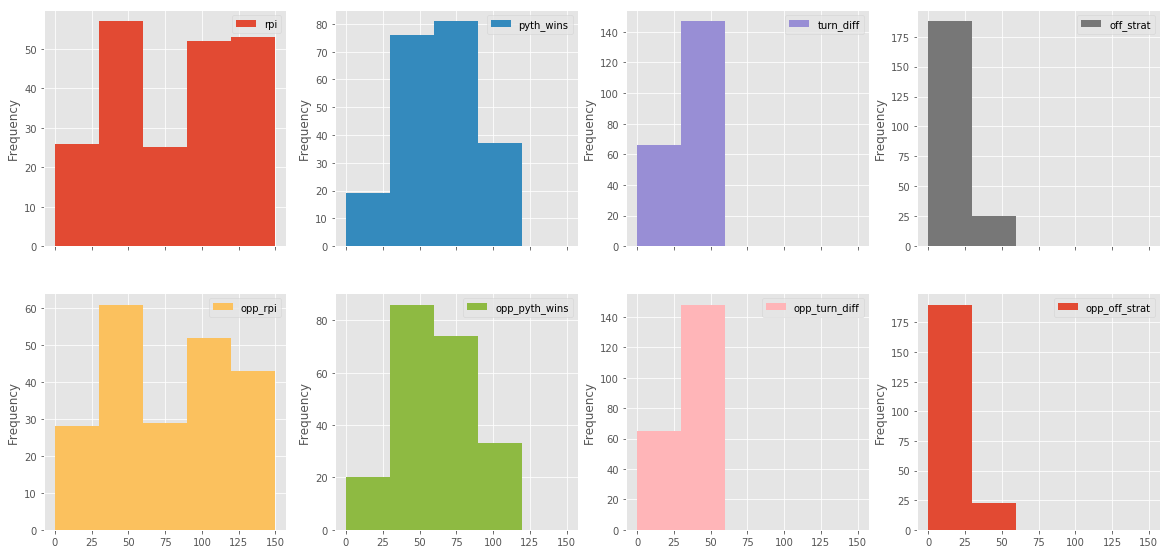

In [9]:
labels = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.plot.hist(subplots=True, layout=(4,4), figsize=(20, 20), bins=5);

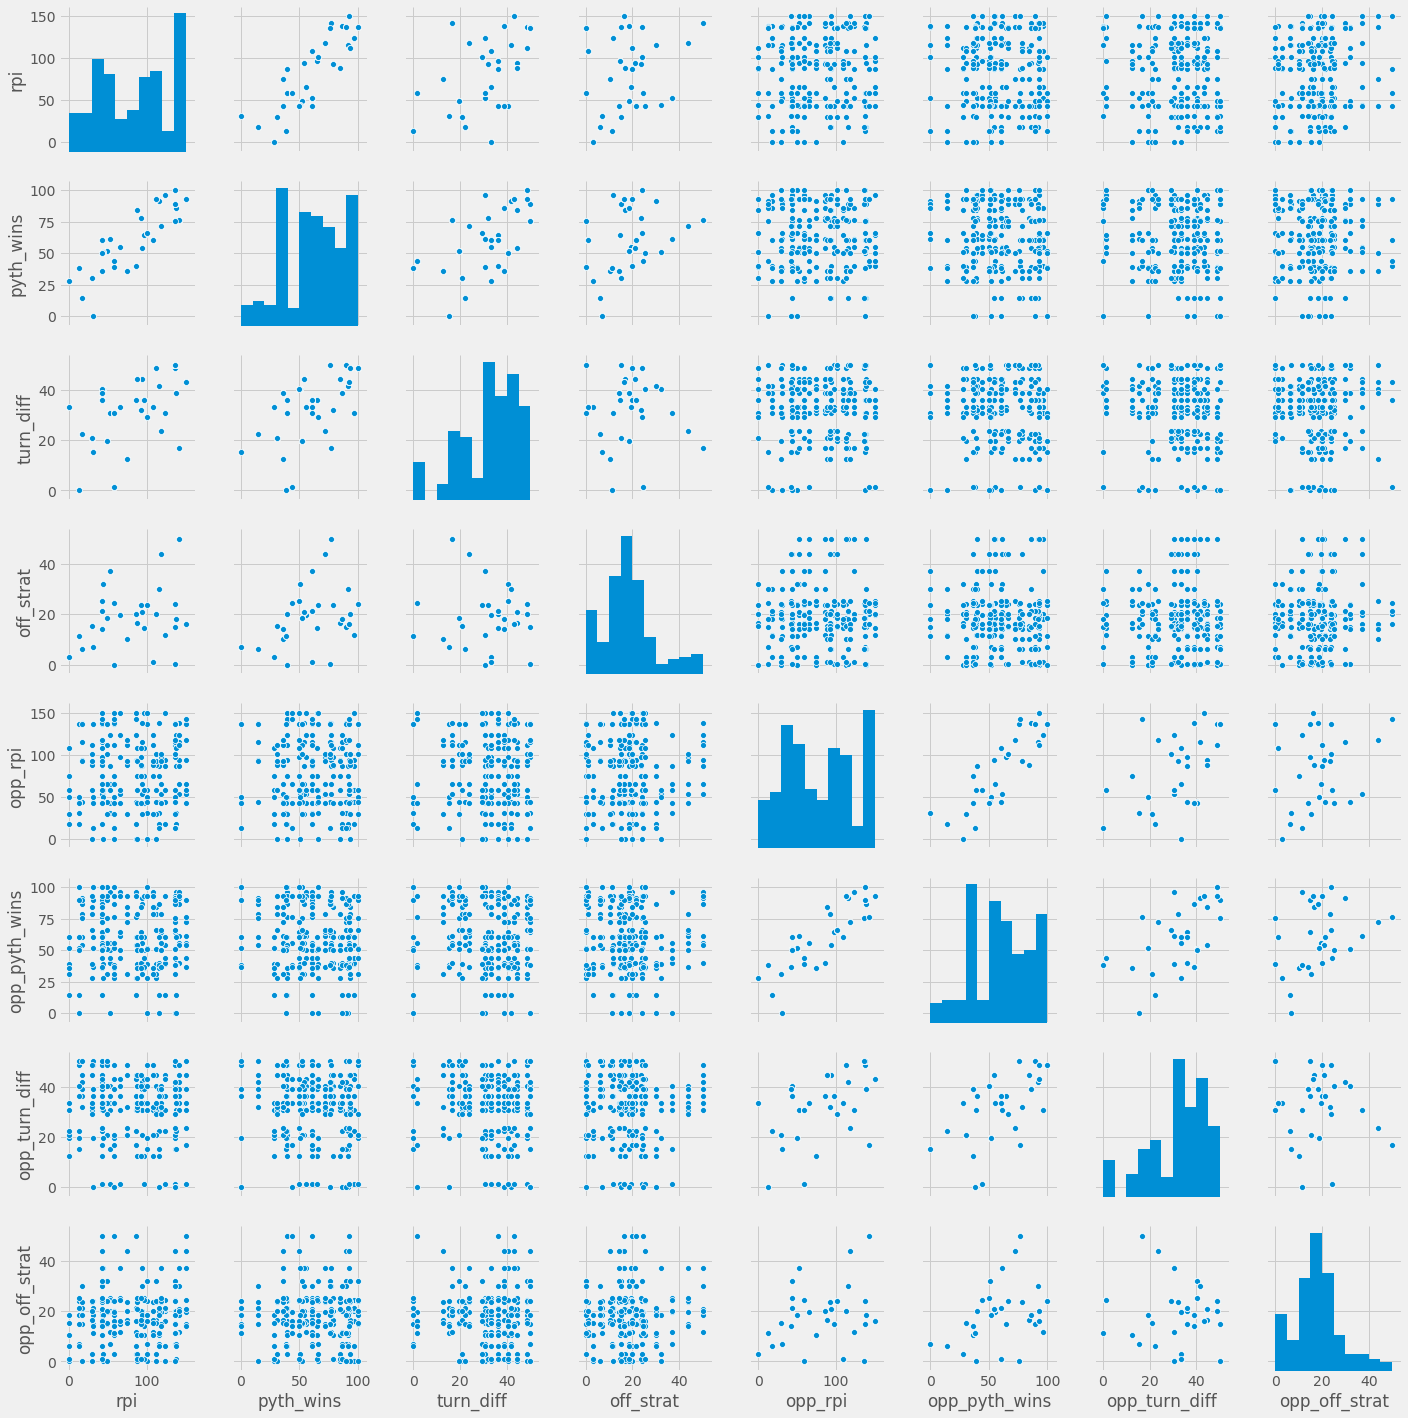

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

sns.pairplot(df)

In [11]:
X = df - df.mean()

X.T.dot(X) / (len(df)-1)

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,1871.637047,927.571733,270.564735,141.383123,39.316237,-13.672207,-25.655291,34.765317
pyth_wins,927.571733,636.686094,183.887227,100.681883,-29.462299,-68.650095,-27.445612,-0.212656
turn_diff,270.564735,183.887227,165.211560,-12.224663,-13.012662,-23.632178,-15.534111,-0.800470
off_strat,141.383123,100.681883,-12.224663,135.866577,-7.521140,-11.662838,0.335179,9.655612
opp_rpi,39.316237,-29.462299,-13.012662,-7.521140,1758.732937,888.166494,266.175743,105.570693
opp_pyth_wins,-13.672207,-68.650095,-23.632178,-11.662838,888.166494,625.159629,187.522358,95.064930
opp_turn_diff,-25.655291,-27.445612,-15.534111,0.335179,266.175743,187.522358,163.280156,4.574982
opp_off_strat,34.765317,-0.212656,-0.800470,9.655612,105.570693,95.064930,4.574982,112.349169


In [12]:

df.cov()


,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,1871.637047,927.571733,270.564735,141.383123,39.316237,-13.672207,-25.655291,34.765317
pyth_wins,927.571733,636.686094,183.887227,100.681883,-29.462299,-68.650095,-27.445612,-0.212656
turn_diff,270.564735,183.887227,165.211560,-12.224663,-13.012662,-23.632178,-15.534111,-0.800470
off_strat,141.383123,100.681883,-12.224663,135.866577,-7.521140,-11.662838,0.335179,9.655612
opp_rpi,39.316237,-29.462299,-13.012662,-7.521140,1758.732937,888.166494,266.175743,105.570693
opp_pyth_wins,-13.672207,-68.650095,-23.632178,-11.662838,888.166494,625.159629,187.522358,95.064930
opp_turn_diff,-25.655291,-27.445612,-15.534111,0.335179,266.175743,187.522358,163.280156,4.574982
opp_off_strat,34.765317,-0.212656,-0.800470,9.655612,105.570693,95.064930,4.574982,112.349169


In [13]:
df.corr()

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,1.000000,0.849716,0.486564,0.280369,0.021670,-0.012640,-0.046409,0.075814
pyth_wins,0.849716,1.000000,0.566981,0.342320,-0.027842,-0.108814,-0.085122,-0.000795
turn_diff,0.486564,0.566981,1.000000,-0.081594,-0.024140,-0.073534,-0.094580,-0.005875
off_strat,0.280369,0.342320,-0.081594,1.000000,-0.015386,-0.040018,0.002250,0.078152
opp_rpi,0.021670,-0.027842,-0.024140,-0.015386,1.000000,0.847030,0.496709,0.237497
opp_pyth_wins,-0.012640,-0.108814,-0.073534,-0.040018,0.847030,1.000000,0.586936,0.358707
opp_turn_diff,-0.046409,-0.085122,-0.094580,0.002250,0.496709,0.586936,1.000000,0.033778
opp_off_strat,0.075814,-0.000795,-0.005875,0.078152,0.237497,0.358707,0.033778,1.000000


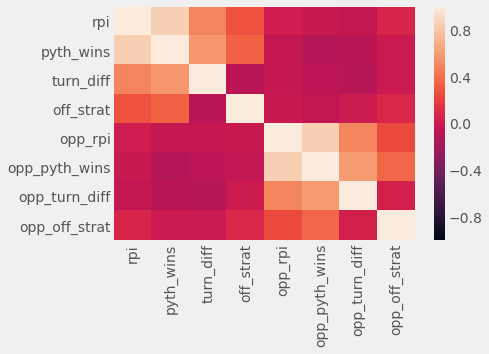

In [14]:
sns.set_palette("coolwarm", 7)
sns.heatmap(df.corr(), vmin=-1, vmax=1) 

In [15]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(df,
                                                          result['outcome'],
                                                          test_size=0.33,
                                                          random_state=42)

In [16]:
#Then build classifier for every team based on each of their games and use W/L as the result

# Here is our first classification model.
   ## The result for Naive-Bayes is ~79% accuracy:

In [17]:
from sklearn.naive_bayes import GaussianNB


# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels.values.ravel())

In [18]:
#print(test_labels)

In [19]:
preds = gnb.predict(test)
#print(preds)


In [20]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.7887323943661971


# Next we have the Decision Tree Model:

In [21]:
features = df.values


In [22]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=10)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, features, result['outcome'], scoring='accuracy')


print("Scores:", scores, "\n")
print("Accuracy:", np.mean(scores))

Scores: [0.6056338  0.61971831 0.64788732] 

Accuracy: 0.6244131455399061


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
#We will fit this transformer to the home teams so that it learns an integer
#representation for each team
encoding.fit(result["home"].values)

home_teams = encoding.transform(result["home"].values)
visitor_teams = encoding.transform(result["away"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T

#we use the OneHotEncoder transformer to encode 

onehot = OneHotEncoder()
#We fit and transform 
X_teams = onehot.fit_transform(X_teams).todense()

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
all_features = np.hstack([df, X_teams])

#we run the decision tree on the new dataset
classifier = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, result['outcome'], scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.6901408450704225


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

classifier=DecisionTreeClassifier()
train.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
test.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']

print(test.head())
classifier=classifier.fit(train,train_labels)
preds=classifier.predict(test)
sklearn.metrics.confusion_matrix(test_labels,preds)
sklearn.metrics.accuracy_score(test_labels, preds)
print("Accuracy: ", sklearn.metrics.accuracy_score(test_labels, preds))

            rpi   pyth_wins  turn_diff  off_strat     opp_rpi  opp_pyth_wins  \
9    138.352151   86.249025  38.888889  18.320549   30.657881       0.000000   
197   42.968950   50.000322  40.277778  25.299063  118.027826      71.952081   
66   137.032800  100.000000  48.611111  23.985030  136.443665      75.859275   
191  150.000000   92.754435  43.055556  16.209349  118.027826      71.952081   
117  100.881362   66.177333  29.166667  23.860706   49.265965      51.833581   

     opp_turn_diff  opp_off_strat  
9        15.277778       6.873080  
197      23.611111      43.942207  
66       50.000000       0.087759  
191      23.611111      43.942207  
117      19.444444      18.568389  
Accuracy:  0.5774647887323944


In [26]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)

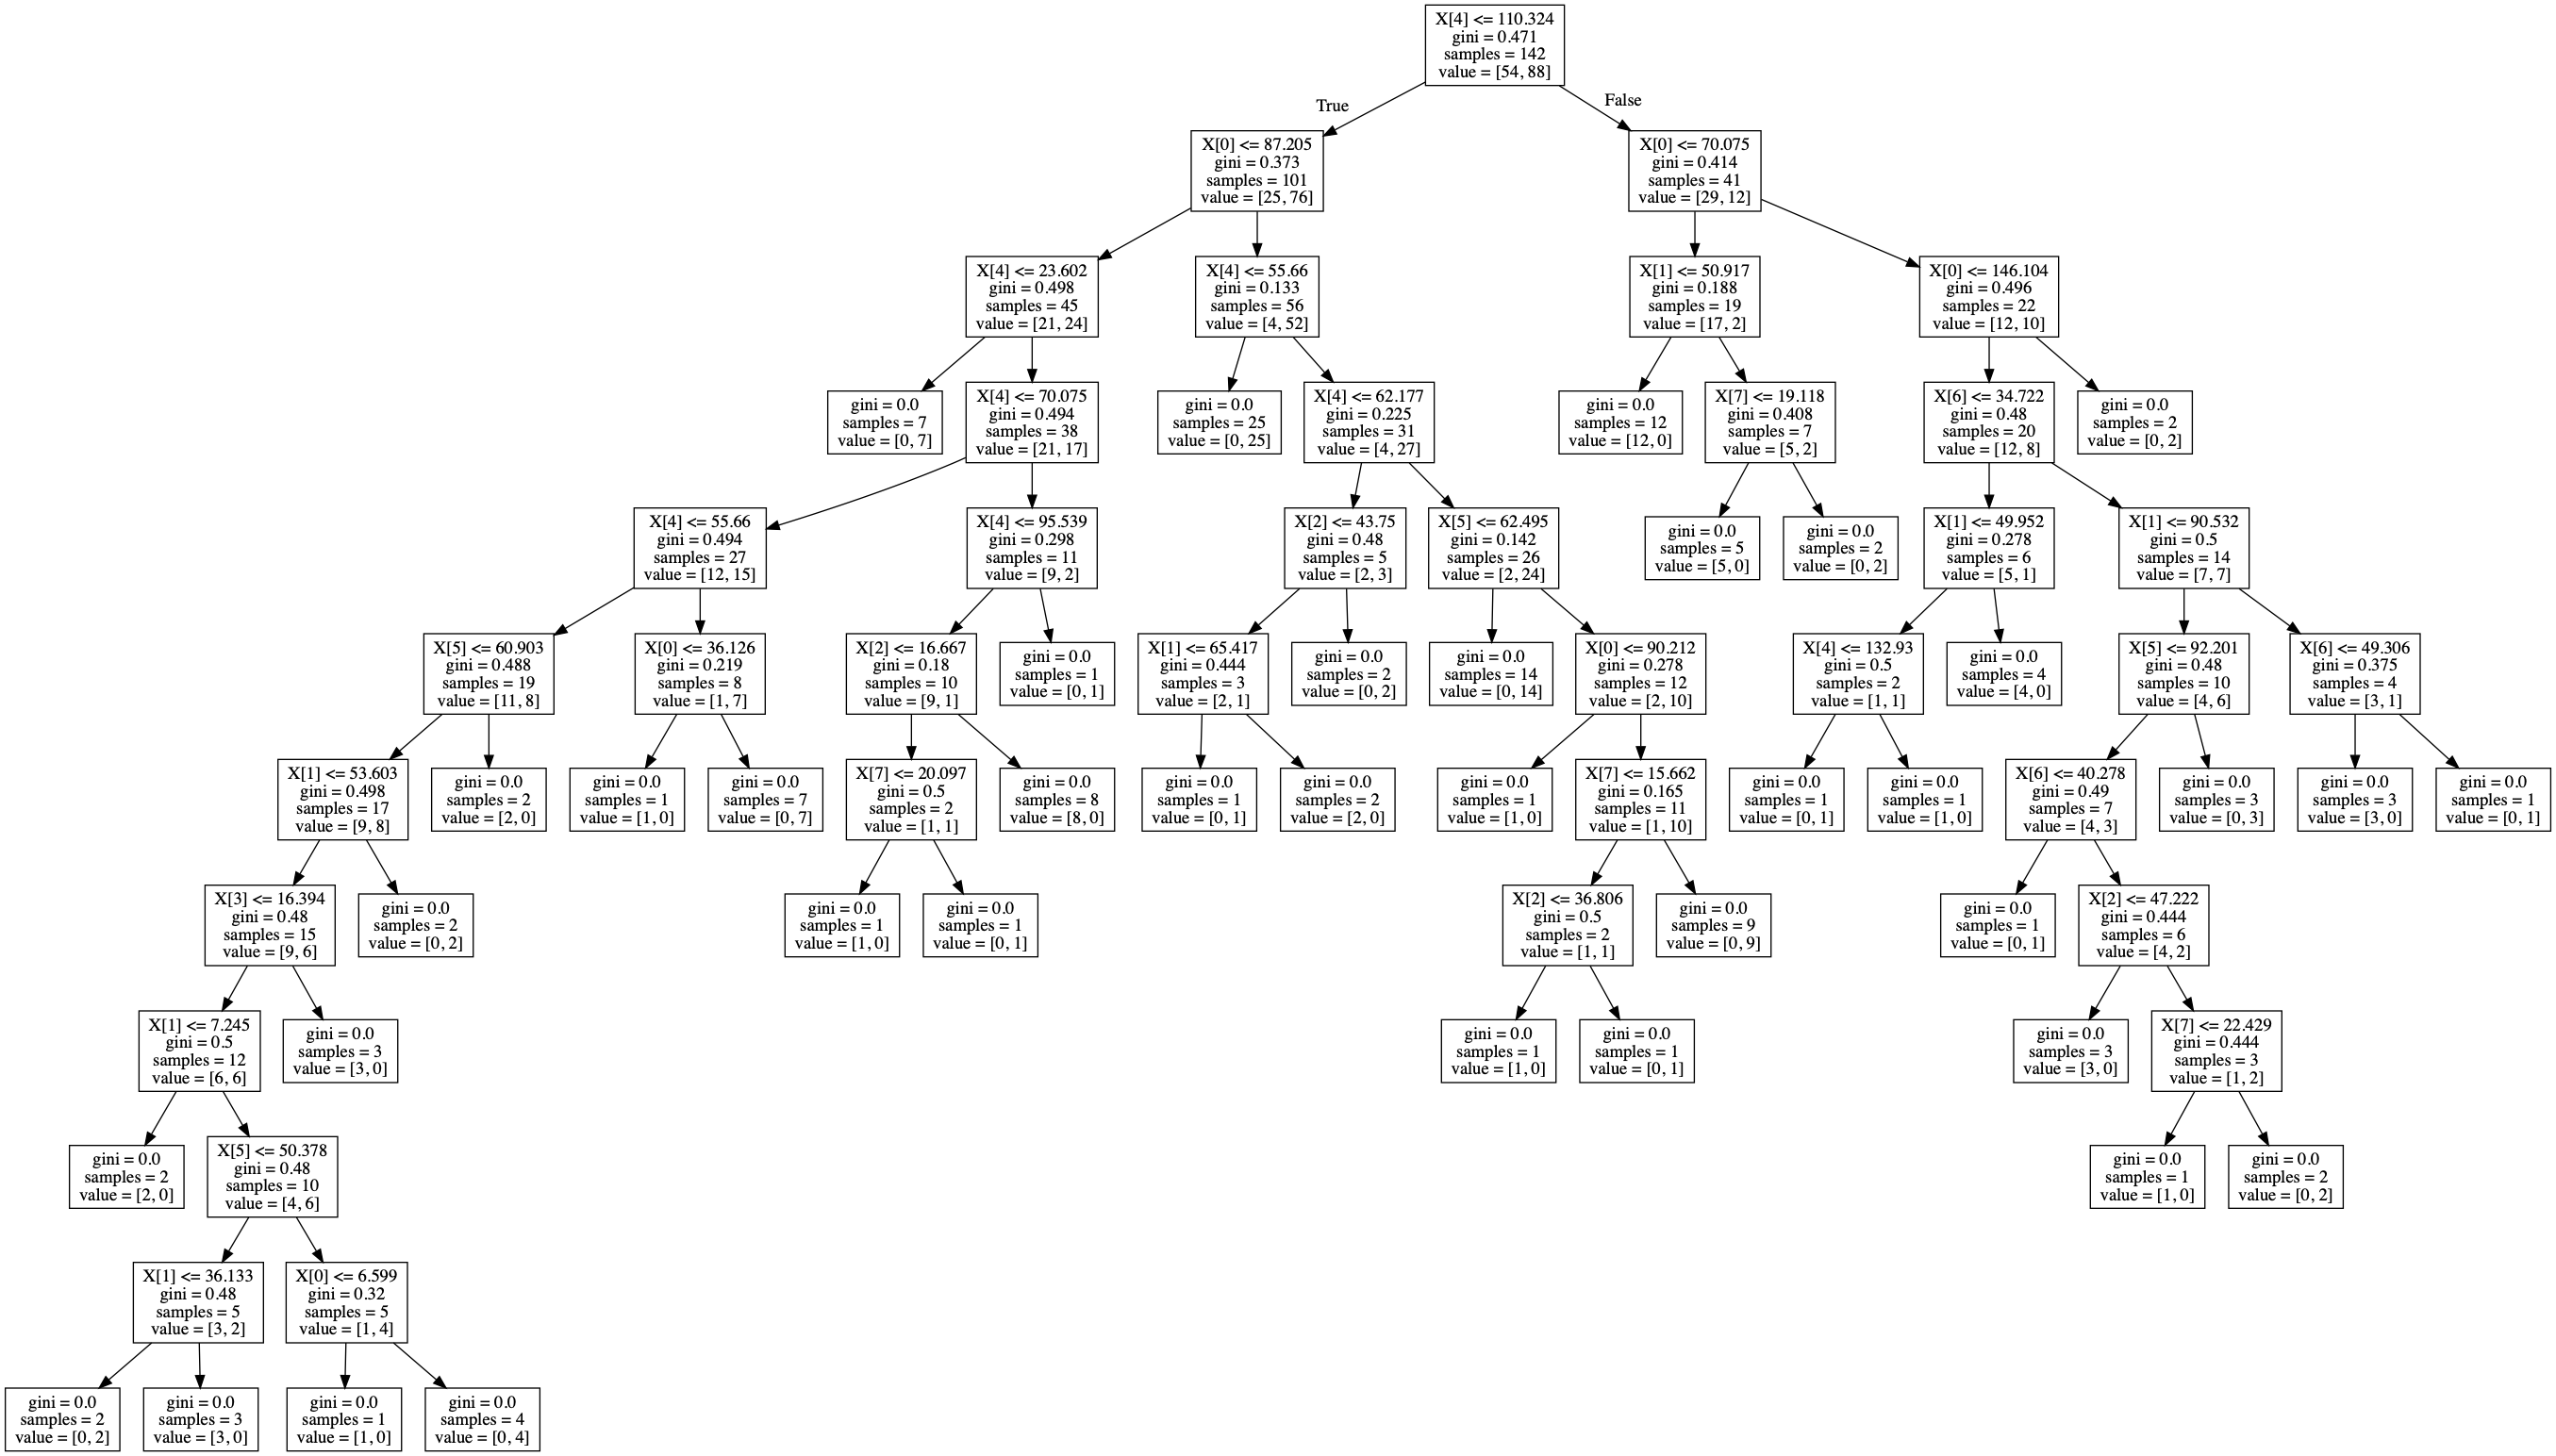

In [27]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

# Finally, we have our Random Forest Model
## The mean accuracy was ~65% accurate, and the best Decision Tree in the forest was ~71% accurate

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, result['outcome'], scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.6525821596244131


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20

In [29]:
from sklearn.model_selection import GridSearchCV
a = {
"max_features": [2, 10, 'auto'],
"n_estimators": [100,],
"criterion": ["gini", "entropy"],
"min_samples_leaf": [2, 4, 6],
}
classifier = RandomForestClassifier(random_state=10)
grid = GridSearchCV(classifier, a)
grid.fit(all_features, result['outcome'])
print("Accuracy:", grid.best_score_)

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.7136150234741784
